In [1]:
from __future__ import division
import pylab as pl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import math
import seaborn as sns

In [2]:
import os 
os.listdir('/Users/keithmitchell/Desktop/Repositories/error.correction.benchmarking/code.evaluation/scripts/data')

['igh_from_master.csv',
 'rsr_from_master.csv',
 't1_from_master.csv',
 'tra_from_master.csv']

In [3]:
os.chdir('/Users/keithmitchell/Desktop/Repositories/error.correction.benchmarking/code.evaluation/scripts/data')
data = pd.read_csv('rsr_from_master.csv')
data.head()

,Unnamed: 0,EC Filename,Wrapper Name,Kmer Size,Read - TP,Read - TN,Read - FN,Read - FN WRONG,Read - FP,Read - FP INDEL,...,Tool,Coverage,Length,Base Sensitivity,Base Precision,Base Gain,Base Accuracy,Dataset,Trim Percent,Trim Effeciency
0,0,bfc_SRR1543964_raw_21.corrected.fastq.gz,run.bfc.sh,21,4041,39832,2521,198,108,0,...,Bfc,NaN,100,0.633644,0.986657,0.625075,0.999532,RSR,0.0,NaN
1,1,bfc_SRR1543965_raw_18.corrected.fastq.gz,run.bfc.sh,18,2375,39991,4120,144,70,0,...,Bfc,NaN,100,0.429239,0.984124,0.422315,0.999386,RSR,0.0,NaN
2,2,bfc_SRR1543965_raw_26.corrected.fastq.gz,run.bfc.sh,26,2671,39991,3876,100,62,0,...,Bfc,NaN,100,0.459250,0.986294,0.452868,0.999420,RSR,0.0,NaN
3,3,bfc_SRR1543965_raw_16.corrected.fastq.gz,run.bfc.sh,16,2236,39983,4252,153,76,0,...,Bfc,NaN,100,0.411520,0.979992,0.403118,0.999366,RSR,0.0,NaN
4,4,bfc_SRR1543964_raw_18.corrected.fastq.gz,run.bfc.sh,18,2304,39831,4256,159,150,0,...,Bfc,NaN,100,0.383428,0.969502,0.371366,0.999230,RSR,0.0,NaN


Tool
Racer       0.997369
Reckoner    0.998690
Musket      0.999070
Fiona       0.999071
Sga         0.999203
Lighter     0.999510
Bfc         0.999536
Name: Base Accuracy, dtype: float64
Tool
Racer      -1.832960
Reckoner   -0.374534
Musket      0.000000
Fiona       0.011924
Sga         0.147654
Lighter     0.476882
Bfc         0.511477
Name: Base Gain, dtype: float64
Tool
Musket      0.000000
Sga         0.163749
Reckoner    0.306272
Lighter     0.512209
Bfc         0.538529
Fiona       0.846379
Racer       0.888866
Name: Base Sensitivity, dtype: float64


/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Tool
Racer       0.254255
Reckoner    0.322813
Fiona       0.507830
Sga         0.904502
Lighter     0.935332
Bfc         0.953129
Musket           NaN
Name: Base Precision, dtype: float64


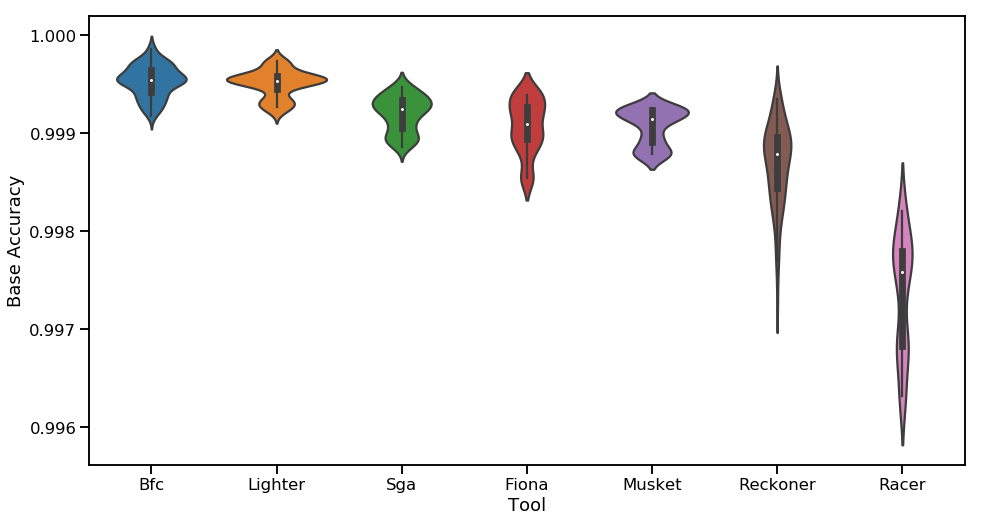

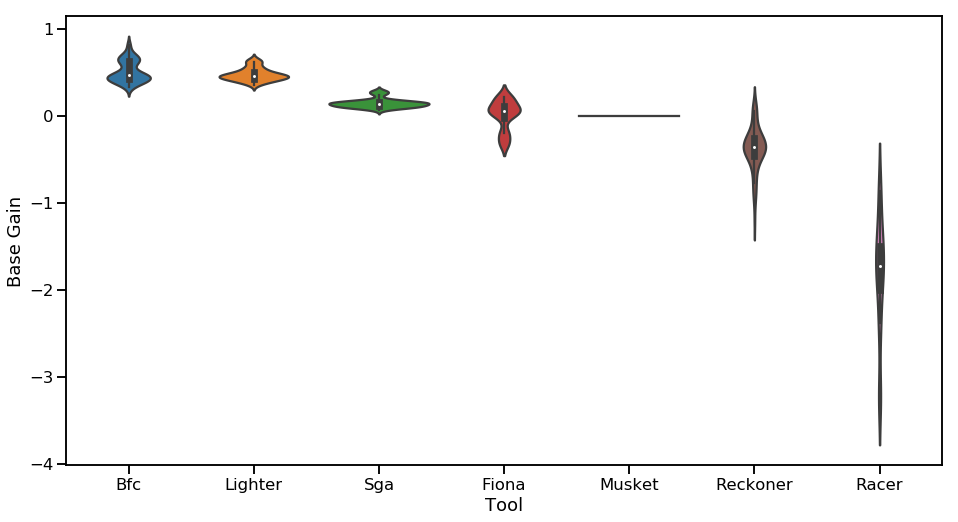

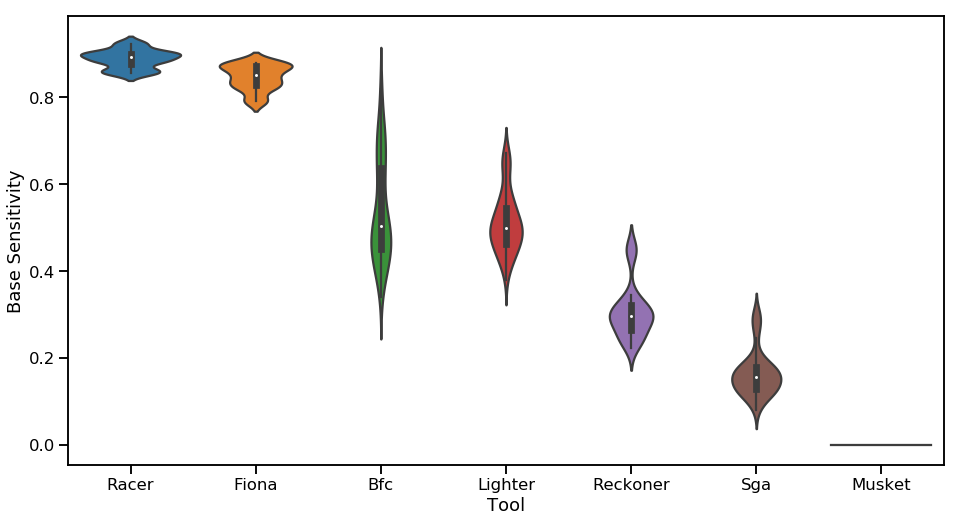

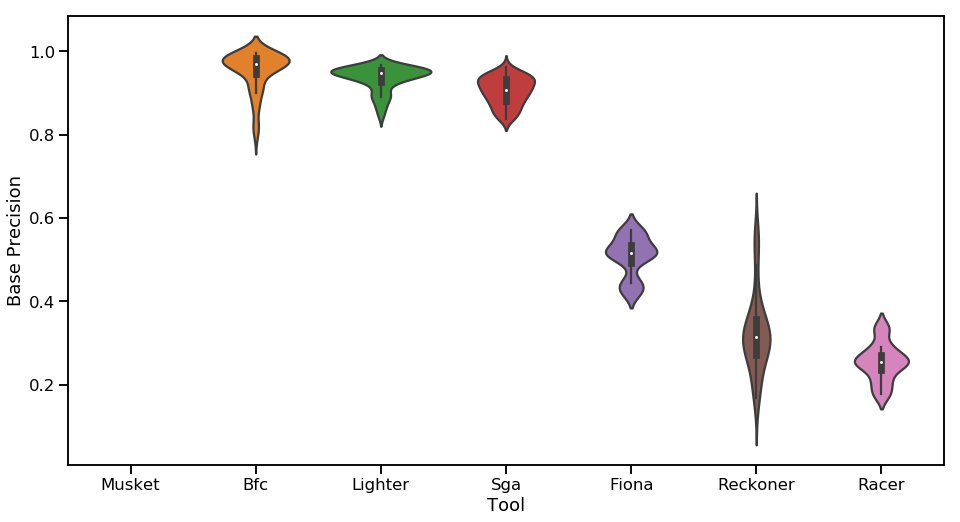

In [4]:
for i in ["Base Accuracy", "Base Gain", "Base Sensitivity", "Base Precision"]:

    ranks = data.groupby("Tool")[i].mean().sort_values()[::-1].index
    print (data.groupby("Tool")[i].mean().sort_values())

    sns.set_context('talk')
    a4_dims = (15.7, 8.27)
    fig, ax = plt.subplots(figsize=a4_dims)
    g = sns.violinplot(ax=ax, x="Tool", y=i, order=ranks,
                 data=data)
    



In [5]:
data_mean = data.groupby('Tool', as_index=False).mean()
data_mean.head()

,Tool,Unnamed: 0,Kmer Size,Read - TP,Read - TN,Read - FN,Read - FN WRONG,Read - FP,Read - FP INDEL,Total Trimmed Reads,...,Base - FP TRIM,Base - TP TRIM,Total Bases,Coverage,Base Sensitivity,Base Precision,Base Gain,Base Accuracy,Trim Percent,Trim Effeciency
0,Bfc,61.477273,21.000000,2803.465909,42286.431818,2852.659091,118.500000,235.431818,0.011364,0.011364,...,0.011364,0.00,1.149457e+07,NaN,0.538529,0.953129,0.511477,0.999536,1.022406e-09,0.000000
1,Fiona,460.818182,21.000000,4385.750000,40336.250000,903.250000,150.500000,829.125000,1691.625000,3.250000,...,3.375000,0.25,1.149650e+07,NaN,0.846379,0.507830,0.011924,0.999071,3.067668e-07,0.047619
2,Lighter,549.919540,20.942529,2237.839080,42189.724138,3475.275862,6.965517,243.586207,0.241379,0.022989,...,0.045977,0.00,1.146057e+07,NaN,0.512209,0.935332,0.476882,0.999510,4.136631e-09,0.000000
3,Musket,654.204545,21.000000,0.000000,42443.250000,5853.250000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00,1.149457e+07,NaN,0.000000,NaN,0.000000,0.999070,0.000000e+00,NaN
4,Racer,775.250000,21.000000,4828.125000,41819.125000,730.250000,0.500000,285.500000,633.000000,86.500000,...,713.250000,0.00,1.150022e+07,NaN,0.888866,0.254255,-1.832960,0.997369,6.277071e-05,0.000000


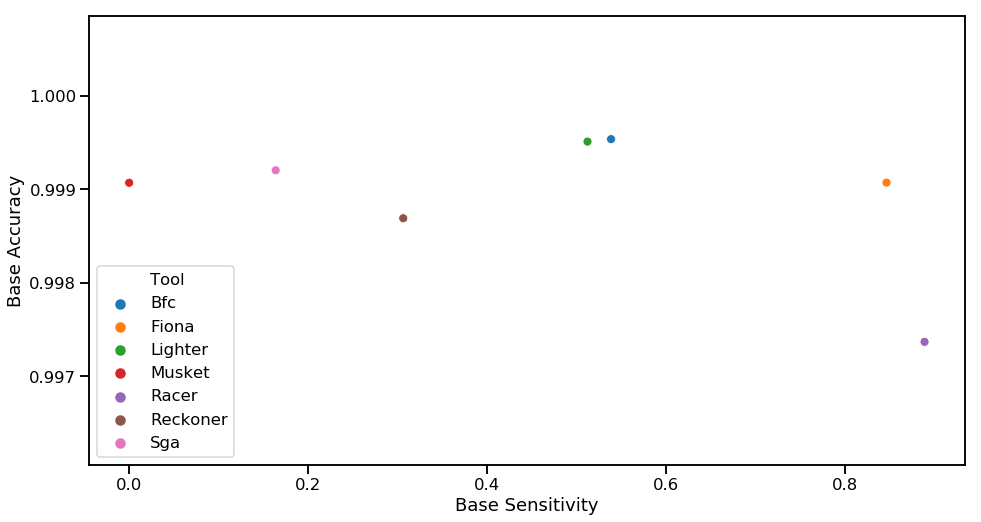

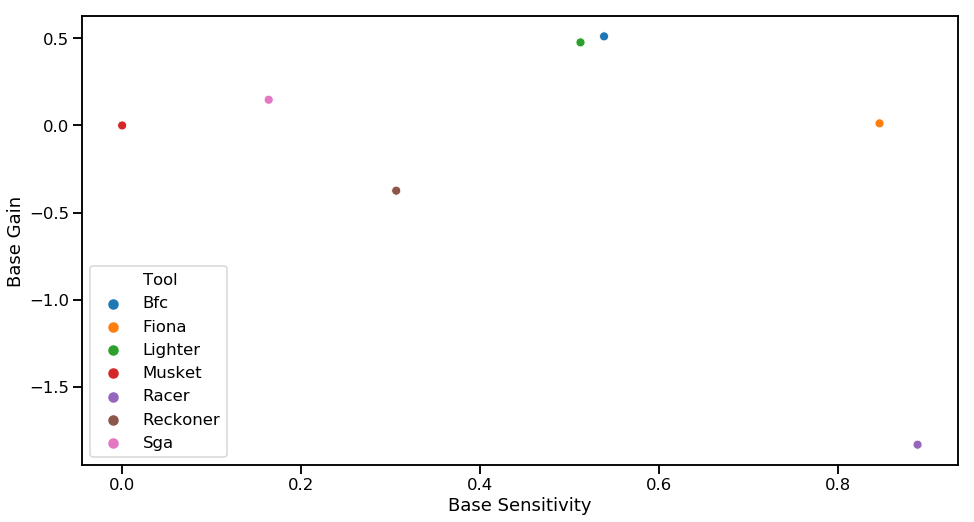

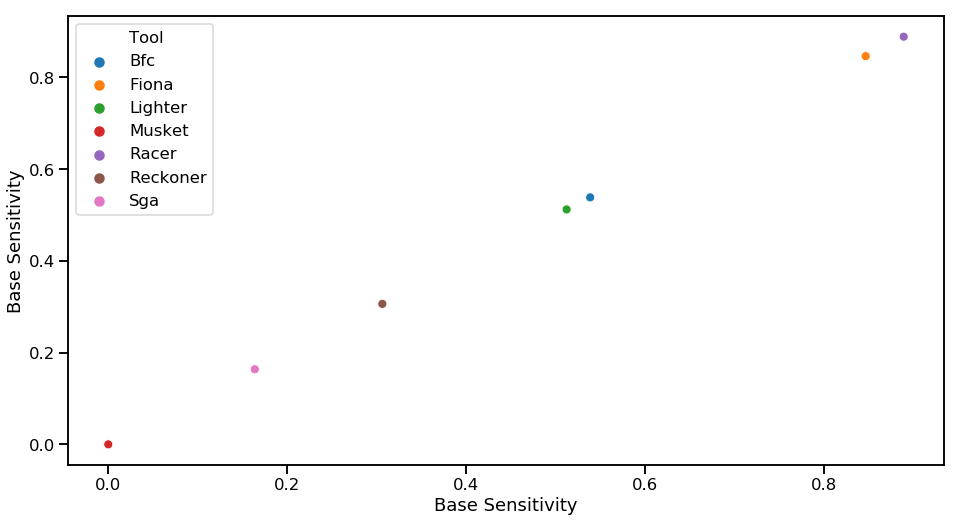

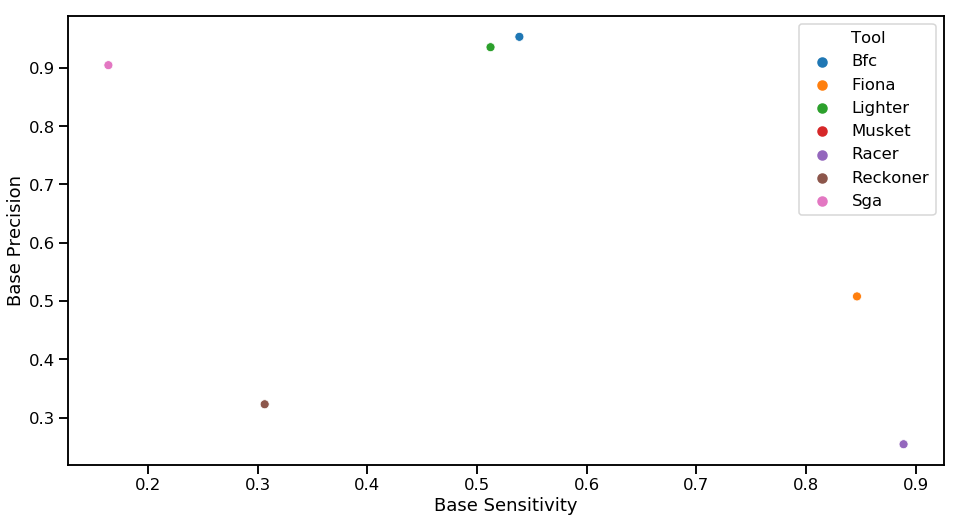

In [6]:
for i in ["Base Accuracy", "Base Gain", "Base Sensitivity", "Base Precision"]:

    sns.set_context('talk')
    a4_dims = (15.7, 8.27)
    fig, ax = plt.subplots(figsize=a4_dims)
#     g = sns.scatterplot(x=data.groupby('Tool')["Trim Effeciency"].mean(), 
#                         y=data.groupby('Tool')[i].mean(), 
#                         hue=data_mean['Tool'])

    g = sns.scatterplot(ax=ax, x='Base Sensitivity', 
                        y=i, 
                        hue='Tool', data=data_mean)

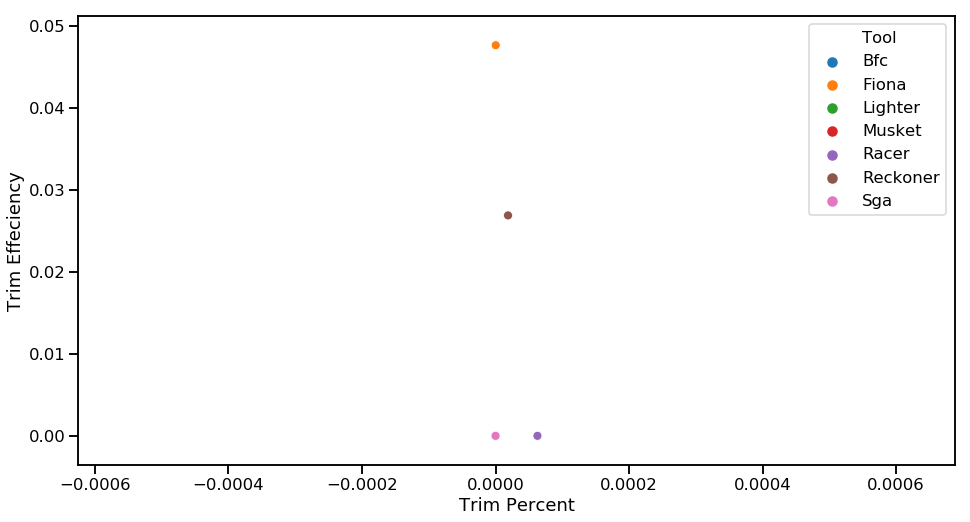

In [7]:
sns.set_context('talk')
a4_dims = (15.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)

g = sns.scatterplot(ax=ax, x='Trim Percent', 
                    y='Trim Effeciency', 
                    hue='Tool', data=data_mean)

In [8]:
data_kmer = data.groupby(['Tool','Kmer Size']).mean().groupby('Tool').var()[['Base Sensitivity', 'Base Precision', 'Base Gain', 'Base Accuracy']]
data_cov = data.groupby(['Tool','Coverage']).mean().groupby('Tool').var()[['Base Sensitivity', 'Base Precision', 'Base Gain', 'Base Accuracy']]

new = pd.concat([data_cov, data_kmer], axis=1, sort=False)
new.columns = ['Base Sensitivity Variance (Coverage)', 
              'Base Precision Variance (Coverage)',
              'Base Gain Variance (Coverage)',
              'Base Accuracy Variance (Coverage)',
              'Base Sensitivity Variance (Kmer Size)',
              'Base Precision Variance (Kmer Size)',
              'Base Gain Variance (Kmer Size)',
              'Base Accuracy Variance (Kmer Size)']   

new

,Base Sensitivity Variance (Coverage),Base Precision Variance (Coverage),Base Gain Variance (Coverage),Base Accuracy Variance (Coverage),Base Sensitivity Variance (Kmer Size),Base Precision Variance (Kmer Size),Base Gain Variance (Kmer Size),Base Accuracy Variance (Kmer Size)
Bfc,NaN,NaN,NaN,NaN,1.195074e-02,2.146536e-04,1.275522e-02,1.066483e-08
Fiona,NaN,NaN,NaN,NaN,1.109336e-32,0.000000e+00,6.921311e-36,1.232595e-32
Lighter,NaN,NaN,NaN,NaN,5.167108e-04,1.846724e-04,7.798587e-04,8.358369e-10
Musket,NaN,NaN,NaN,NaN,0.000000e+00,NaN,0.000000e+00,0.000000e+00
Racer,NaN,NaN,NaN,NaN,0.000000e+00,6.162976e-34,4.930381e-33,2.465190e-33
Reckoner,NaN,NaN,NaN,NaN,1.053288e-04,3.224782e-03,3.847191e-02,3.411130e-08
Sga,NaN,NaN,NaN,NaN,3.803644e-04,3.989454e-05,3.128968e-04,2.661991e-10


[Text(0,0,'Bfc'),
 Text(0,0,'Fiona'),
 Text(0,0,'Lighter'),
 Text(0,0,'Musket'),
 Text(0,0,'Racer'),
 Text(0,0,'Reckoner'),
 Text(0,0,'Sga')]

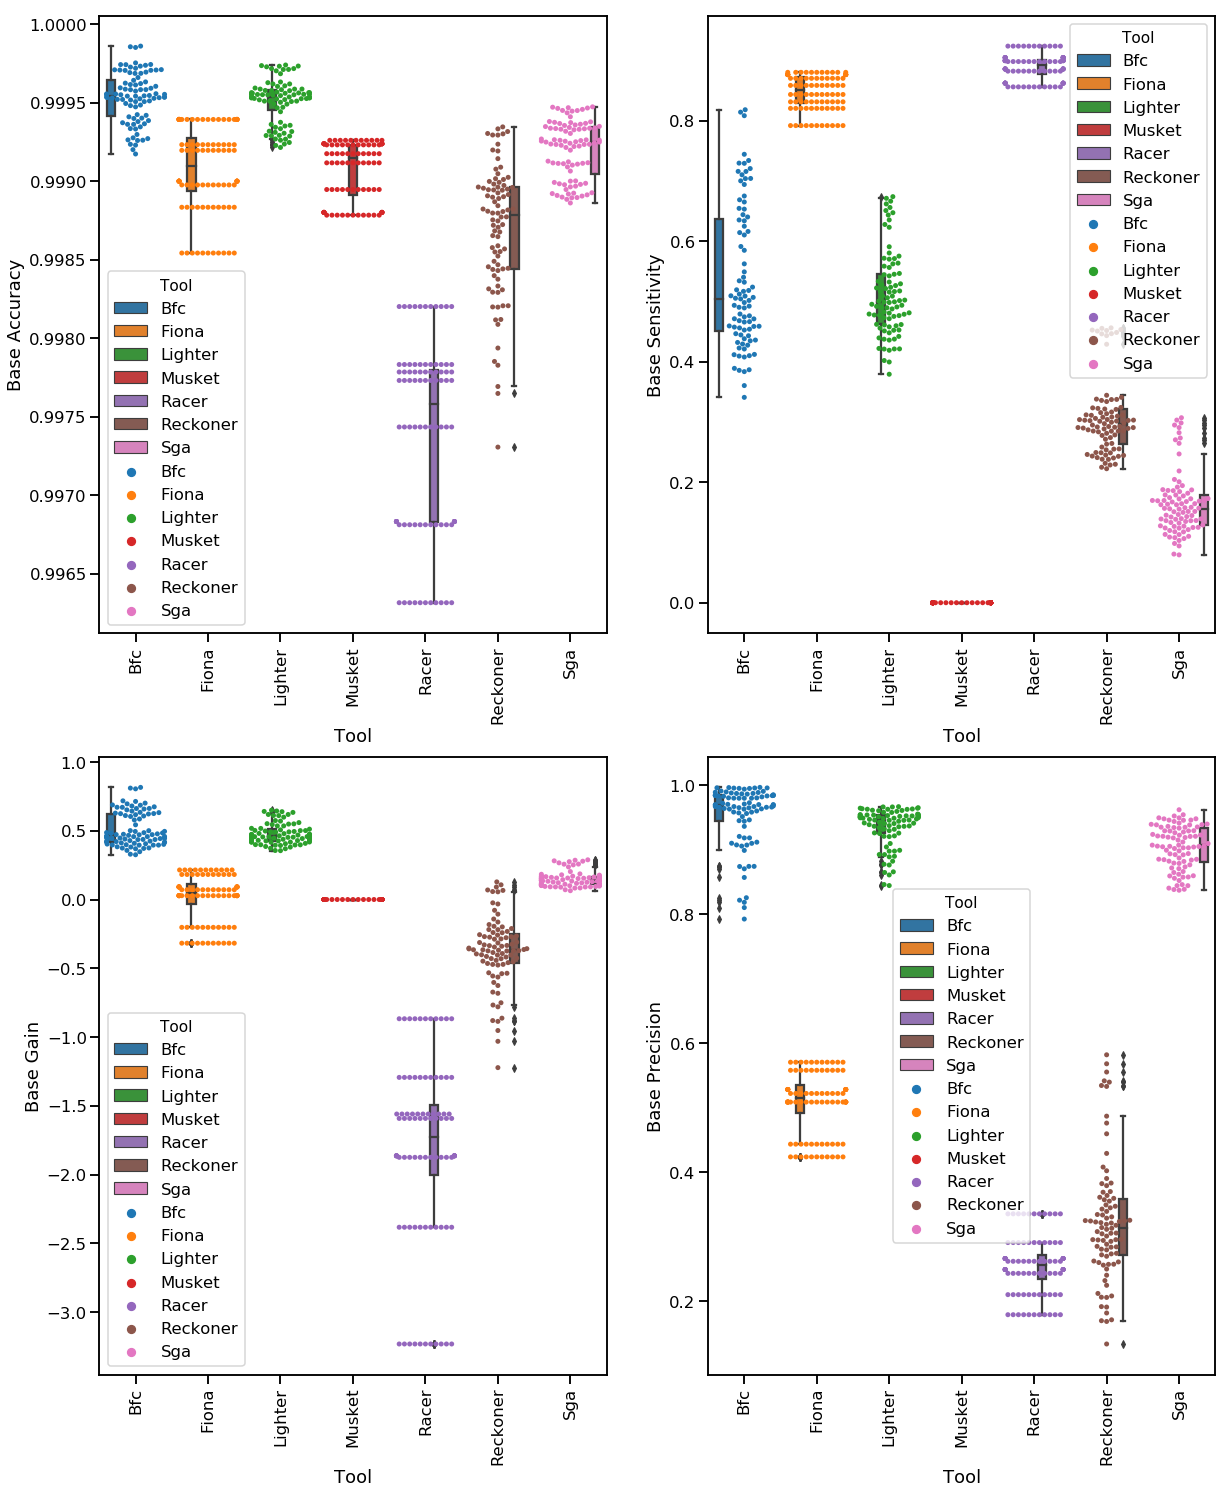

In [26]:
a4_dims = (20, 25)
fig, axs = plt.subplots(ncols=2, nrows=2, figsize=a4_dims)
plt.xticks(rotation='vertical')
sns.set_context('talk')

g = sns.boxplot(ax=axs[0][0], x="Tool", y="Base Accuracy", data=data, hue='Tool')
g = sns.swarmplot(ax=axs[0][0], x="Tool", y="Base Accuracy", data=data, hue='Tool')
g.set_xticklabels(rotation=90, labels=data['Tool'].unique())

g = sns.boxplot(ax=axs[0][1], x="Tool", y="Base Sensitivity", data=data, hue='Tool')
g = sns.swarmplot(ax=axs[0][1], x="Tool", y="Base Sensitivity", data=data, hue='Tool')
g.set_xticklabels(rotation=90, labels=data['Tool'].unique())

g = sns.boxplot(ax=axs[1][0], x="Tool", y="Base Gain", data=data, hue='Tool')
g = sns.swarmplot(ax=axs[1][0], x="Tool", y="Base Gain", data=data, hue='Tool')
g.set_xticklabels(rotation=90, labels=data['Tool'].unique())

g = sns.boxplot(ax=axs[1][1], x="Tool", y="Base Precision", data=data, hue='Tool')
g = sns.swarmplot(ax=axs[1][1], x="Tool", y="Base Precision", data=data, hue='Tool')
g.set_xticklabels(rotation=90, labels=data['Tool'].unique())